# Machine Learning TP 1
### Realisé par :Abdelbaki GUIR


# Dimensionality Reduction using PCA: Application to Fashion MNIST

In this example, we will use Principal Components Analysis as a dimensionality reduction tool. 
**Dimensionality reduction** consists in taking a matrix (rows are subjects/objects/individuals and colomns are observations/features) and "compressing it" to a new matrix, with less new observations. The objective is to reduce the number of observations (the dimension), while preserving as much as possible the information contained/expressed by the originbal data (matrix).


## Dataset

We will use in this example, the fashion MNIST dataset. Let's load it and explore its content

In [53]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import normalize 

df = pd.read_csv("fashion-mnist_test.csv")
X = df.iloc[:, 1:] # The Original matrix. Each row is an 28x28 gray-level image.
y = df.iloc[:, :1] # The class of the image.

Xn = X.values 
yn = y.values 

X_norm = Xn / 255

## Let's explore the content of MNIST Fashion dataset.

Work to do :
- Determine the number of images in the dataset from y.
- Determine the number of classes from y.
- Load a sample of 6 randomly selected images (remember that the size of the iamges is 28x28).
- Plot the six images
- Add a text description of the dataset here :
## Description :
The Fashion MNIST dataset is a large freely available database of fashion images that is commonly used for training and testing various machine learning systems.Fashion-MNIST was intended to serve as a replacement for the original MNIST database for benchmarking machine learning algorithms, as it shares the same image size, data format and the structure of training and testing splits.
The dataset contains 70,000 28x28 grayscale images of fashion products from 10 categories from a dataset of Zalando article images, with 7,000 images per category. The training set consists of 60,000 images and the test set consists of 10,000 images. The dataset is commonly included in standard machine learning libraries.
To plot an image, you can use:
- plt.imshow(Xn[45].reshape(28,28), cmap='gray_r', interpolation='nearest')
    
To select a random image index you can use:
- randIndex= np.random.randint(number_images)

The full description of this datset is available following the URL:
https://research.zalando.com/welcome/mission/research-projects/fashion-mnist/


The number of images = 10000
The number of classes = 10


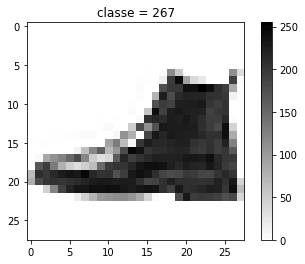

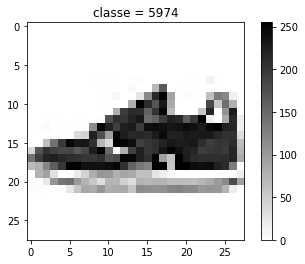

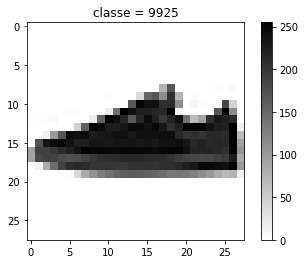

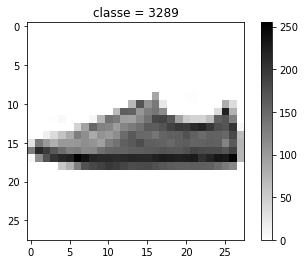

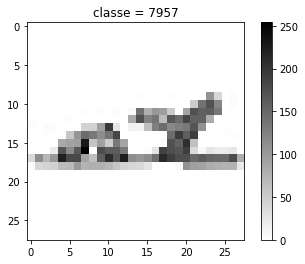

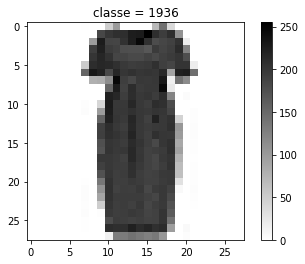

In [55]:
from matplotlib import pyplot as plt

# COMPLETE THE CODE HERE
number_images = len(yn)
number_classes = len(np.unique(yn))

print('The number of images = {}'.format(number_images))
print('The number of classes = {}'.format(number_classes))

# COMPLETE THE CODE HERE
randIndex= np.random.randint(number_images, size=6)
for i in range (6):
    plt.imshow(Xn[randIndex[i]].reshape(28,28), cmap='gray_r', interpolation='nearest')
    plt.title('classe = {}'.format(randIndex[i]))
    plt.colorbar()
    plt.show()
plt.show()



## Before starting...

Let's have a look to the mean and the standard deviation of our data...

To do:
- Plot the mean image.
- Compute the standard deviation and plot it.
- Analyze the mean and the STD. 

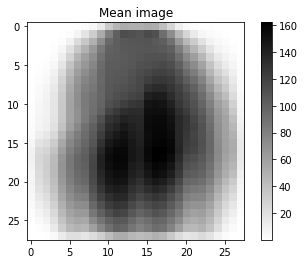

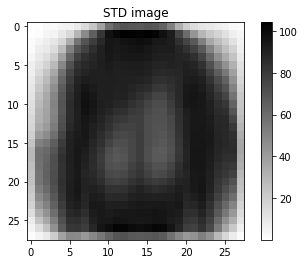

In [85]:
m = np.mean(Xn, axis=0)
plt.imshow(m.reshape(28,28), cmap='gray_r')
plt.title("Mean image")
plt.colorbar()
plt.show()

m = np.std(Xn, axis=0)
plt.imshow(m.reshape(28,28), cmap='gray_r')
plt.title("STD image")  
plt.colorbar()
plt.show()

### Your comments and analysis: 
We notice that for the image mean we can not really distinguish a clear figure
as for the second image we clearly distinguish the outline of a sweater so these are the elements with the largest standard deviation

## Application of PCA on the data: 1st scenario

Work to do :
- Apply PCA on data stored in X and keep only the 5 first components.
- Transform the data X using the computed PCA and store the result in X_r.
- Plot the 4 first components an images. The components are stored in pca.components_

The result of applying PCA on Fashion MNIST : Each principal component is a potentially interpretable picture of what each vector is finding.


Work to do :
- For each of the 4 first components, print the corresponding "explained variance ratio". 
- Comment the pictures.

la dimension du Xn aprés l''application du CPA : (10000, 15)


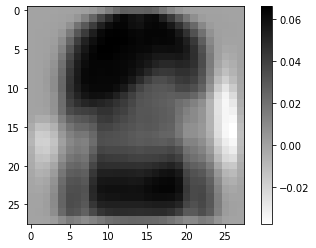

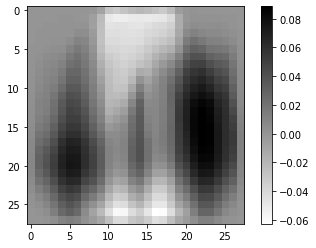

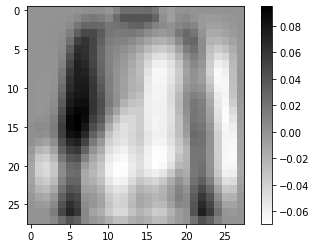

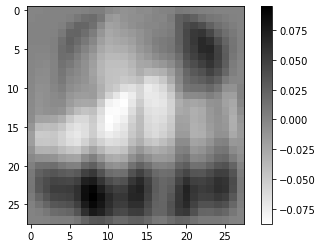

In [79]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15)
Xn_r = pca.fit(Xn).transform(Xn)
print("la dimension du Xn aprés l''application du CPA :",Xn_r.shape)

for i in range (4):
    plt.imshow(pca.components_[i].reshape(28,28), cmap='gray_r', interpolation='nearest')
    plt.colorbar()
    plt.show()

In [86]:
print(pca.components_.shape)
print("we can see that we have lost some informations, the dimension got reduced to 5 and the images got reduced from 10000 to ",pca.components_.shape[0])
for i in range (4):
    print("Standard deviation of the composante {} = {} " .format(i,pca.explained_variance_ratio_[i]))

(15, 784)
we can see that we have lost some informations, the dimension got reduced to 5 and the images got reduced from 10000 to  15
Standard deviation of the composante 0 = 0.2902808995842222 
Standard deviation of the composante 1 = 0.17902618915175542 
Standard deviation of the composante 2 = 0.05961972250564989 
Standard deviation of the composante 3 = 0.04979192688492653 


## And the following components...

- Plot the 10 following components and the corresponding explained variance ratio.
- What do you notice?


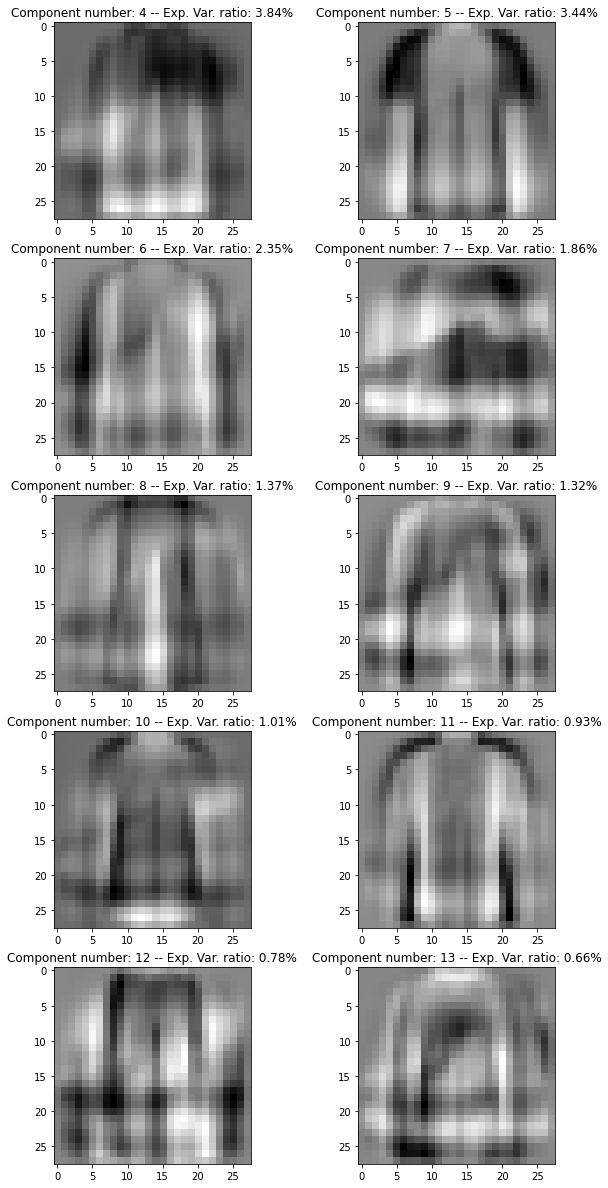

In [83]:
fig = plt.figure()
fig.set_figheight(21)
fig.set_figwidth(10)
for i in range(10):
    ax = pca.components_[i+4, :].reshape(28, 28)
    fig.add_subplot(5,2,i+1)
    plt.imshow(ax, cmap='gray_r')
    plt.title("Component number: {0:} -- Exp. Var. ratio: {1:.2f}%".format(i+4, pca.explained_variance_ratio_[i+4]*100))                                        
    
plt.show()

# Note

The more images lose resolution the more the explained variance ration decreases because the information carried decreases

## How many components should we retain?

You notice that most of these components look like they have some sort of shoe-related thing going on.

Each additional component (dimension) we add to the PCA captures less and less of the variance in the model. 
The first component is the most important one, followed by the second, then the third, and so on.

The question is how to decide how many dimension should kept in the transformed space?

Work to do:
- Plot the explained variance ratio for the 15 first components.
- Plot the cumulative sum of explained variance ratio for the 15 first components.
- Analyse the figures.

Remember:
- The explained variance ratios are stored in "pca.explained_variance_ratio_".
- The objective is to Determine a "cutoff".


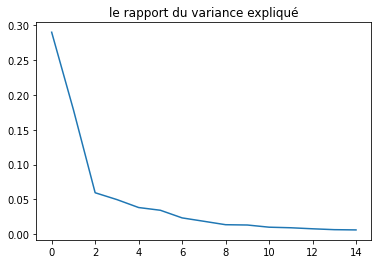

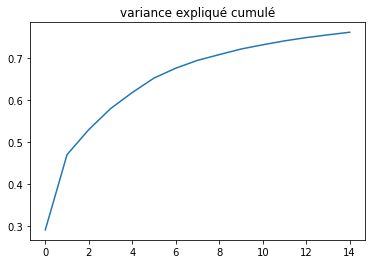

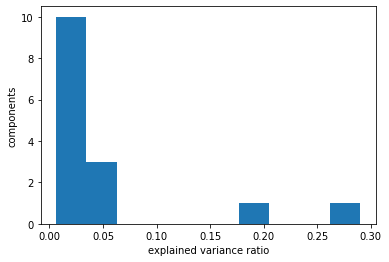

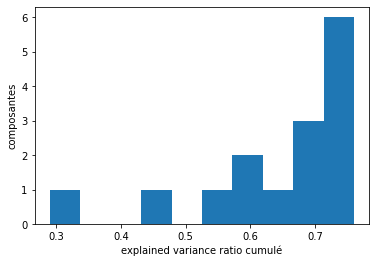

In [87]:
plt.plot(pca.explained_variance_ratio_)
plt.title("le rapport du variance expliqué")
plt.show()
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.title("variance expliqué cumulé")
plt.show()
plt.hist(pca.explained_variance_ratio_)
plt.ylabel("components")
plt.xlabel("explained variance ratio") 
plt.show()

#Histograme cumulé
plt.hist(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel("composantes")
plt.xlabel("explained variance ratio cumulé")
plt.show()

## Figure analysis 
we can see that the first components have the higher inertia. we can then be content to retain only a few components with the greatest inertia.

## General analysis

The understanding above (specifically, explained variance and understanding how to find and interpret which coefficients go into each dimension-reduced component) is sufficient for using PCA for plug-and-play modeling purposes. However, it's useful to have a "toolbox" for comprehending dimensionality reduction output.

Dimensionality reduction techniques (and more specifically PCA) can be used to understand clusters of variables which co-occur with one another. We can think of each new vector across the dataset values as being some new composite variable that the dimensionality reduction technique has come up with. For example, suppose we find that the third PCA vector is a good indicator of the "shoe-ness" of an item in the Fashion MNIST dataset. We could compute this vector, grab it, and push it back into our original matrix of features as a new column. If we were previously having trouble distinguishing shoes in the dataset, this might significantly increase the accuracy of our model!

Even if none of the variables in the dataset are worth pushing back to our original feature matrix, PCA will still help us probe for new features. If dimensionality reduction picks up shoe-ness in some sense, then that's a good indication that trying to define "shoe-ness" in the data is a good idea to try to engineer as a feature.


## I. Assessing the quality of new reduced space from PCA - Considering reconstruction

One possible way to assess the quality of the reduced space computed using PCA is to analyse the reconstruction process of the original vector from the projected ones.


To do:
- Let's consider again Fashion MNIST. 
- Compute a PCA and keep Rd components => Dimension of the new representation space = Rd
- Project the original vectors to the new Rd-dimensional space (Xn_r).
- Reconstruct the orginal vector from the projected one (XR).
- Plot a randomily selected sample of 6 original images: For each image, plot the reconstructed corresponding image.
- Perform this sequence of steps for different values of Rd: 2, 5, 10, 50, 100, 150
- Analyze and comment the obtained results.


### 1st step: Computing PCA and projecting the original images.

In [61]:
from sklearn.preprocessing import normalize 
Xn_norm = normalize(Xn)

pca = PCA(n_components=150)
Xn_norm_r = pca.fit(Xn_norm).transform(Xn_norm)

### 2nd step: Write a reconstruction function

In [62]:
def reconstruct(X, PCAtrans):
    """
    Creates a reconstruction of an input record, X, given a transformation (PCAtrans)
    
    Note 1: In this dataset each record is the set of pixels in the image (flattened to 
    one row).
    Note 2: R should be normalized before input.
    
    """
    # Invert the PCA transformation.
    ret = PCAtrans.inverse_transform(X)
    
    # This process results in non-normal noise on the margins of the data.
    # We clip the results to fit in the [0, 1] interval.
    ret[ret < 0] = 0
    ret[ret > 255] = 255
    return ret

### 3rd step: Reconstruct and plot

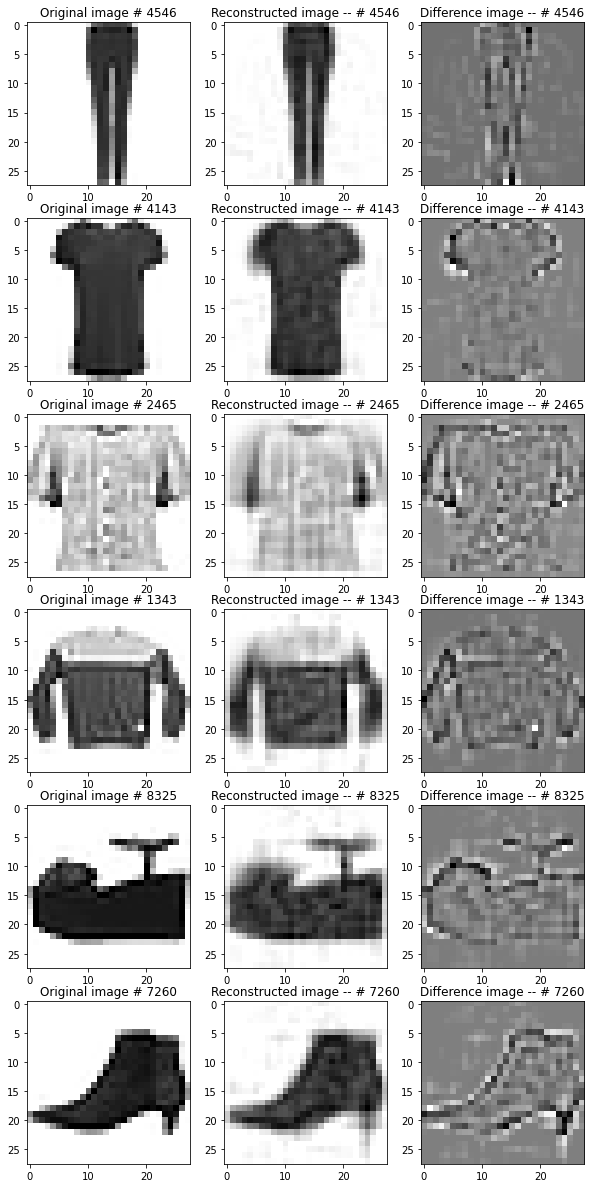

In [64]:
fig = plt.figure()
fig.set_figheight(21)
fig.set_figwidth(10)


for k in range(6):
    cur = np.random.randint(number_images)
    
    a = Xn_norm[cur] #... COMPLETE THE CODE HERE ("a" should be the original image # cur)
    fig.add_subplot(6,3,(3*k)+1)
    plt.imshow(a.reshape(28,28), cmap='gray_r')
    plt.title('Original image # {}'.format(cur))

    b = reconstruct(Xn_norm_r, pca)[cur] #... COMPLETE THE CODE HERE ("b" should be the recustructed image of "a")
    fig.add_subplot(6,3,(3*k)+2)
    plt.imshow(b.reshape(28,28), cmap='gray_r')
    plt.title('Reconstructed image -- # {}'.format(cur))

    c= a-b #... COMPLETE THE CODE HERE ("c" should be the image-difference between "a" and "b")
    fig.add_subplot(6,3,(3*k)+3)
    plt.imshow(c.reshape(28,28), cmap='gray_r')
    plt.title('Difference image -- # {}'.format(cur))

plt.show()

### 4th Step: Reconstruct and plot with different PCA models varying the reduced dimension (5, 10, 50, 100, 150, 200...)

We notice that the reconstruction is well done and we have obtained images that are clearer, and we notice only a slight difference between the initial vector and the reconstituted vector

## II. Assessing the PCA components - Considering distance of data to components (OPTIONAL)

We can assess the quality of each principal component by analyzing the distribution of the distances of data vectors w.r.t. the principal component.

Let's do it step by step:
- write a function that computes the Euclidien distances between a principal component and all of the vectors.
- Consider the 8 first principal components, and for each component, plot the histogram of its distances (w.r.t. the vectors of the dataset).

In [65]:
from sklearn.preprocessing import normalize 
Xn_norm = normalize(Xn)

pca = PCA(n_components=150)
Xn_norm_r = pca.fit(Xn_norm).transform(Xn_norm)

In [66]:
from scipy.spatial import distance

def record_distance(X, vector):
    
    return pd.Series([distance.euclidean(X[i, :], vector) for i in range(len(X))])

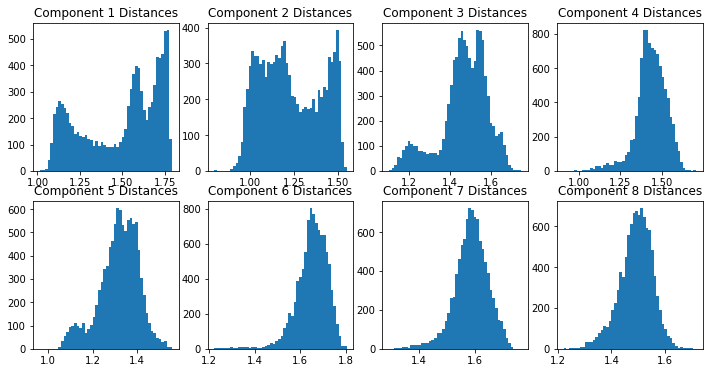

In [67]:
fig, axarr = plt.subplots(2, 4, figsize=(12, 6))
axarr = np.array(axarr).flatten()

for i in range(0, 8):
    record_distance(Xn_norm, pca.components_[i]).plot.hist(bins=50, ax=axarr[i])
    axarr[i].set_title("Component {0} Distances".format(i + 1), fontsize=12)
    axarr[i].set_xlabel("")
    axarr[i].set_ylabel("")

#### Analysis

Each histogram shows the distribution of the Euclidean distances of vectors w.r.t. a principal component.

- Give a description to what would be the histogram shape corresponding to a "bad" principal component.
- Give a description to what would be the histogram shape corresponding to a "good" principal component.
 ## Answer :
A bad component would be one that would have a non-uniform distribution of the histogram
while a good component would be rather described by a histogram with two peaks because this shows a clear distingtion between two sets


## General Conclusion 

The advantage of PCA (and dimensionality reduction in general) is that it compresses your data down to something that is more effectively modeled. This means that it will, for example, compress away highly correlated and colinear variables, a useful thing to do when trying to run models that would otherwise be sensitive to these data problems.

As a pre-processing technique, dimensionality reduction makes the most sense when it is used to redesign a dataset with particularly many artificially defined features. Image datasets, for example, are a perfect target for PCA because they are entirely artificial: pixel values are simply not particularly meaningful to us as casual observers; whereas "does this look more like a shoe or a pair of pants" *is*.

This notebook demonstrated (hopefully) the power of PCA for lending insight to your analysis for just such an image dataset. It's worth knowing that the techniques here can be extended to non-image datasets, of course. The results will be harder to interpret. You'll need to spend more time staring at records to understand why the things are pointing the way they're pointing. But it's ultimately still a very powerful, very important technique.

Finally, PCA/dimensionality reduction can be used as a part of the pipeline search process to squeeze one last bit of performace out of a model. If the result is a model which is *significantly less* interpretable than the one you started with, I caution avoiding this if you can. Avoid putting into production models that you can't explain, or at least put a lot of effort into understanding them! See the comments for arguments on this particular point.

# Conclusion
THE ACP is a fundamental method in multidimensional descriptive analysis that  reduce the dimensions in order to be able to visualize the data and measure the correlation between them

- The reconstruction of the original data set allows us to know the reliability of our reduction

- Explained variance ration allows us to know the amount of information carried by the different components 

- Conaitre a good APC from a bad APC ensures the reliability of the data and facilitates the handling of the latter.






NB. This notebook is based on "Selfish Gene's notebooks" and the notebook from Kaggle : https://www.kaggle.com/residentmario/dimensionality-reduction-and-pca-for-fashion-mnist